### Pulsar Detection using FITS Data

***
This Notebook, is a simulation on how astronomers work with the FITS Data, which is officially tagged as the Astronomy Data,
__Flexible Image Transport System__, is used to efficiently handle the astronomical data which is very enormous by default. FITS format also have the functionality to efficiently study the METADATA for certain FITS file to quickly grab insights of the data.
***
_The Jupyter Notebook under Venus/ directory shows the basic structure of FITS data_
_I described on how to output the metadata for a given file and how to plot the data as an image using matplotlib library_

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [7]:
header = fits.open('./fitsdat/image0.fits')
print('Data shape:',header[0].data.shape)
data = header[0].data
print('The maximum pixel value {}'.format(np.unravel_index(np.argmax(data, axis=None), data.shape)))

Data shape: (200, 200)
The maximum pixel value (100, 100)


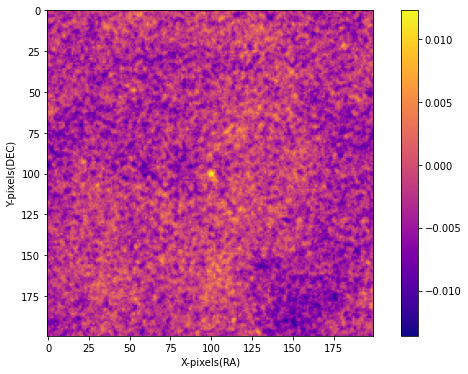

In [13]:
'''
The Yellow dot in the following Pixel can pulsar(supernova remnant) or some other flux which can 
be known by furthur study
'''
#ploting 
data = header[0].data
plt.figure(figsize=(10,6))
plt.xlabel('X-pixels(RA)')
plt.ylabel('Y-pixels(DEC)')
plt.imshow(data,cmap=plt.cm.plasma)
plt.colorbar()
plt.show()
# pd.DataFrame(data)


The brighest point is (101, 100)


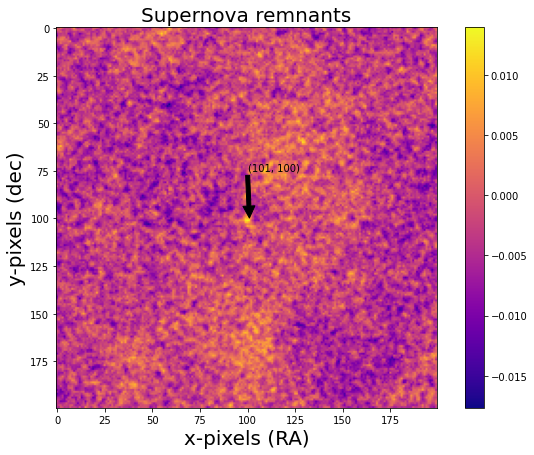

In [12]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
def load_fits(filename):
    data = fits.open(filename)[0].data
    return np.unravel_index(np.argmax(data,axis=None),data.shape)

if __name__ == '__main__':
    
  # Run your `load_fits` function with examples:
    bright = load_fits('./fitsdat/image1.fits')
    print('The brighest point is {}'.format(bright))

    hdulist = fits.open('./fitsdat/image1.fits')
    data = hdulist[0].data

  # Plot the 2D image data
    plt.figure(figsize=(10,7))
    plt.xlabel('x-pixels (RA)',size=20)
    plt.ylabel('y-pixels (dec)',size=20)
    plt.title('Supernova remnants',size=20)
    plt.annotate(bright,
    xytext = (100, 75),
    xy = bright,
    arrowprops = { 'facecolor' : 'black', 'shrink' : 0.01 })
    plt.imshow(data, cmap=plt.cm.plasma)
    plt.colorbar()
    plt.show()
    



This point now can either be a potential pulsar detection or a distant radio galaxy, which is determined after further examination of the data

### stacking the fits mean data to saturate the detection point

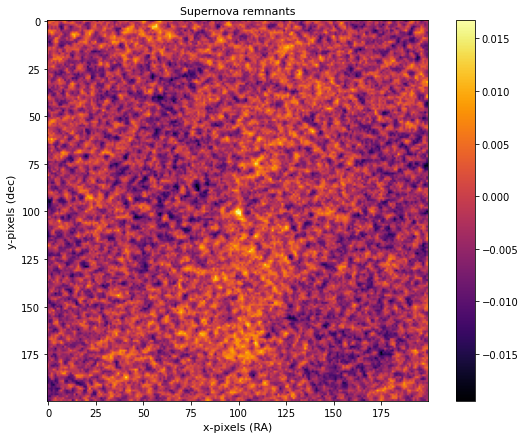

In [21]:
# Write your mean_fits function here:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
def mean_fits(filenamelist):
    data = np.array([fits.open(name)[0].data for name in filenamelist])
    mean = np.mean(data,axis=0)
    return mean
    

if __name__ == '__main__':
    
    data  = mean_fits(['./fitsdat/image0.fits', './fitsdat/image1.fits', './fitsdat/image2.fits','./fitsdat/image3.fits'])
    plt.figure(figsize=(10,7))
    plt.xlabel('x-pixels (RA)',size=11)
    plt.ylabel('y-pixels (dec)',size=11)
    plt.title('Supernova remnants',size=11)
    plt.imshow(data, cmap=plt.cm.inferno)
    plt.colorbar()
    plt.show()

In [ ]:
# two plot, from multiple fits files 
filelist = ['image0.fits', 'image1.fits', 'image2.fits']
data = np.array([fits.open(name)[0].data for name in filelist])
mean = np.mean(data,axis=0)
mean.T

_The Notes Regarding the actual datacollection and the details about the astronomy data are augumented_